In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit,BasicAer, ClassicalRegister,QuantumRegister,execute
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [36]:
n = 2

oracle = 'c'

if oracle == 'b':
    b = 3
if oracle == 'c':
    c = np.random.randint(2)

IndentationError: expected an indented block (<ipython-input-36-21b8374aaa42>, line 8)

In [35]:
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
circ = QuantumCircuit(qr,cr)

barriers = True

circ.x(qr[n])

if(barriers):
    circ.barrier()

circ.h(qr)

if barriers:
    circ.barrier()

if oracle == 'c':
    if c == 1:
        circ.x(qr[n])
    else:
        circ.iden(qr[n])
else:
    for i in range(n):
        if(b&(1<<i)):
            circ.cx(qr[i],qr[n])
if barriers:
    circ.barrier()

for i in range(n):
    circ.h(qr[i])
for i in range(n):
    circ.measure(qr[i],cr[i])

NameError: name 'c' is not defined

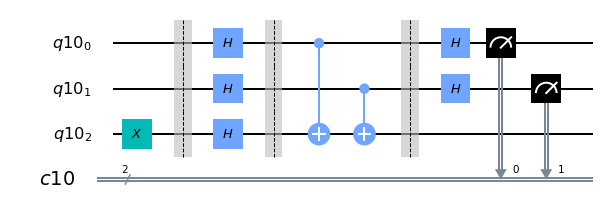

In [32]:
circ.draw(output='mpl')

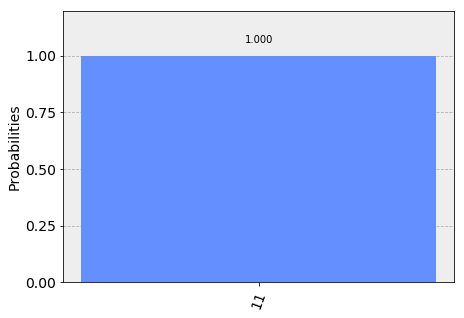

In [33]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
result = execute(circ,backend=backend,shots=shots).result()
plot_histogram(result.get_counts())